In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
data = pd.read_csv("Electric_Production.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
data.index

Index(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01', '1939-05-01',
       '1939-06-01', '1939-07-01', '1939-08-01', '1939-09-01', '1939-10-01',
       ...
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
      dtype='object', name='DATE', length=954)

In [4]:
# Renaming column 
data.columns = ['Energy Production']

In [5]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [6]:
data.shape

(954, 1)

In [7]:
data.index = pd.to_datetime(data.index)

In [8]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='DATE', length=954, freq=None)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 954 entries, 1939-01-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Energy Production  954 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [15]:
!pip install pmdarima

     |████████████████████████████████| 592 kB 515 kB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 1.3 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [16]:
# Importing auto_arima from pmdarima
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data,start_=1,start_q=1,
                           max_p=3,max_q=3,m=12,
                           start_p=0,seasonal=True,
                           d=1,D=1,trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3849.507, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4226.662, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4048.141, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3850.307, Time=0.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4011.125, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=3824.436, Time=1.58 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3899.506, Time=0.66 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3789.730, Time=5.50 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3844.227, Time=2.04 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=3870.108, Time=4.45 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3690.617, Time=5.48 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3722.200, Time=3.36 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3705.062, Time=1.94 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3728.477, Time=0.78 sec
 ARIMA(1,1,0)(2,1,2

In [17]:
corrmat = data.corr()
corrmat

,Energy Production
Energy Production,1.0


<AxesSubplot:>

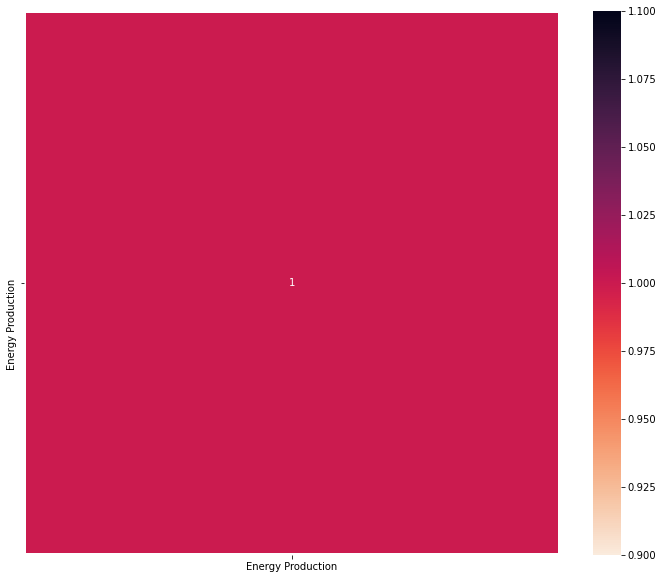

In [37]:
import seaborn as sns
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='rocket_r',linecolor='white',linewidth=3)

In [18]:
stepwise_model.aic()

3687.48034801993

In [19]:
# Converting data into statinary time series
data2 = np.log(data) # Converting into log data

In [20]:
data2.head()

,Energy Production
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [21]:
train = data2.loc['1939-01-01':'2016-12-01']
test = data2.loc['2016-01-01':]

In [22]:
train.head()

,Energy Production
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [23]:
train.tail()

,Energy Production
DATE,
2016-08-01,4.749101
2016-09-01,4.626763
2016-10-01,4.507477
2016-11-01,4.524756
2016-12-01,4.729683


In [24]:
test.head()

,Energy Production
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


In [25]:
test.tail()

,Energy Production
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [26]:
len(test)

30

In [27]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [28]:
future_forecast = stepwise_model.predict(n_periods = 30)

In [29]:
future_forecast

array([4.82511882, 4.72588903, 4.62403546, 4.52327896, 4.54483364,
       4.66753755, 4.75625588, 4.75526852, 4.64859768, 4.54863356,
       4.58304907, 4.73891401, 4.83030543, 4.74884486, 4.65370074,
       4.54070274, 4.56020476, 4.68052137, 4.76867231, 4.76463882,
       4.66229892, 4.56365599, 4.5969768 , 4.74168978, 4.8371092 ,
       4.75392804, 4.6578069 , 4.54980823, 4.56884047, 4.69088614])

In [30]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns = ['Prediction'])

In [31]:
future_forecast.head()

,Prediction
DATE,
2016-01-01,4.825119
2016-02-01,4.725889
2016-03-01,4.624035
2016-04-01,4.523279
2016-05-01,4.544834


In [32]:
test.head()

,Energy Production
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


<AxesSubplot:xlabel='DATE'>

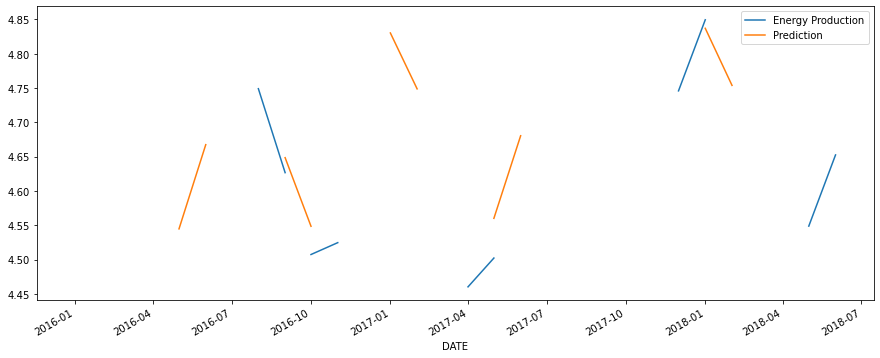

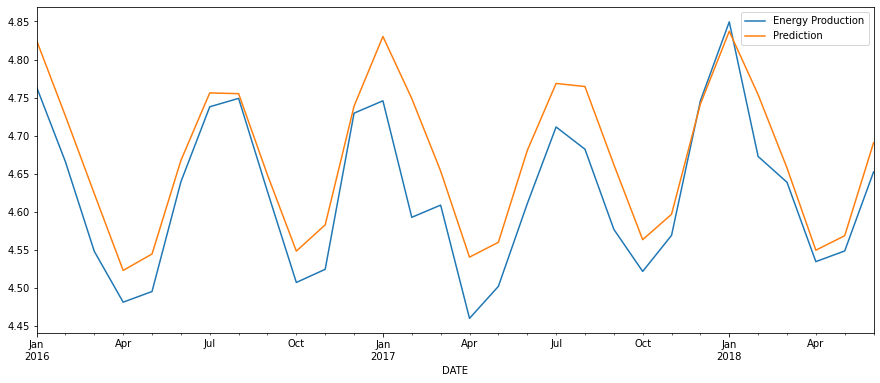

In [33]:
pd.concat([test,future_forecast],axis=0).plot()
pd.concat([test,future_forecast],axis=1).plot()

In [34]:
future_forecast2 = np.exp(future_forecast)

<AxesSubplot:xlabel='DATE'>

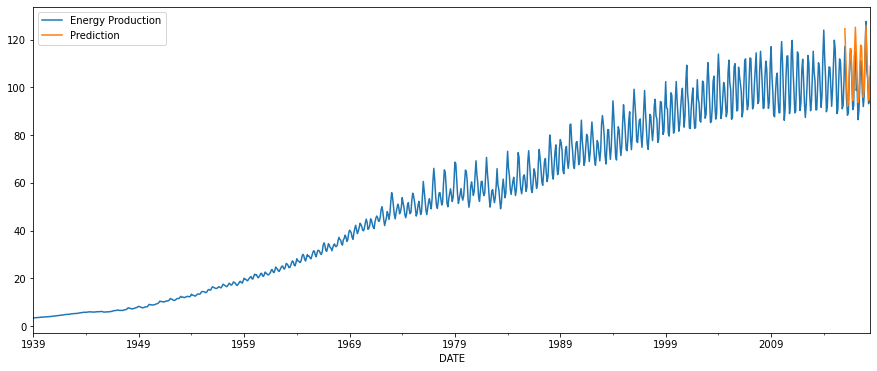

In [35]:
pd.concat([data,future_forecast2],axis=1).plot()

In [39]:
from sklearn.metrics import r2_score
print("r2score = ",r2_score(np.exp(test),future_forecast2)*100,'%')

r2score =  64.44952342323893 %
